<a href="https://colab.research.google.com/github/rodrigoaugustov/Airbnb-Analysis/blob/master/Airbnb_Analysis_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - TORONTO

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2019-12-07/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.35,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [4]:
# identificar o volume de dados do DataFrame
print("Quantidade de Entradas: \t", df.shape[0])
print("Quantidade de Atributos: \t", df.shape[1])
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Quantidade de Entradas: 	 23397
Quantidade de Atributos: 	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível observar que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.187631
last_review                       0.187631
host_name                         0.012181
name                              0.000043
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Pela análise dos histogramas podemos observar que há indícios da presença de *outliers* nas variáveis `minimum_nights`, `calculated_host_listings_count` e `price`

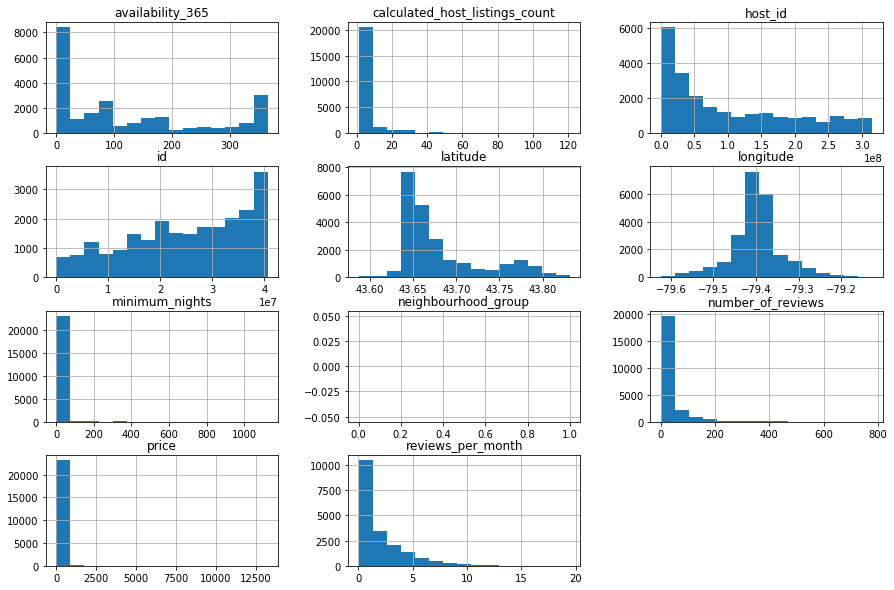

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Identificando e removendo *Outliers***

Primeiro vamos analisar o resumo estatístico das variáveis

In [7]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23397.000000,23397.000000,23397.000000,19007.000000,23397.000000,23397.000000
mean,148.707099,6.692354,27.940462,1.924827,5.082489,121.921101
std,329.417941,28.525808,51.164465,2.177279,12.007540,129.425663
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.360000,1.000000,0.000000
50%,99.000000,2.000000,8.000000,1.060000,1.000000,80.000000
75%,160.000000,3.000000,31.000000,2.790000,4.000000,201.000000
max,13255.000000,1125.000000,779.000000,19.460000,121.000000,365.000000


Conforme indicado pela análise dos histogramas, podemos confirmar que:

* A variável `price` possui 75% dos valores abaixo de 160, porém seu valor máximo é de 13255. Isso faz com que haja distorção na média de preços, como pode ser observado quando comparamos a média com a mediana.

* O valor máximo da variável `minimum_nights` está acima de 365 dias que é a quantidade de máxima de dias permitida.

* A variável `calculated_host_listings_count` também apresenta distorção nos valores, porém isso se dá ao fato de que a maioria dos imóveis são anunciados por pessoas que possuem somente um imóvel, no entanto há empresas que utilizam a plataforma do AirBnb para anunciar seus imóveis.
No momento não faremos alterações nessa variável, mas futuramente pode ser objeto de estudo para comparar se há diferenças nos imóveis anunciados por quem possui somente um imóvel dos anunciados por quem possui mais de um imóvel.

Vamos plotar um boxplot para analisar as variáveis `price` e `minimum_nights`

#### Boxplot para `price` 



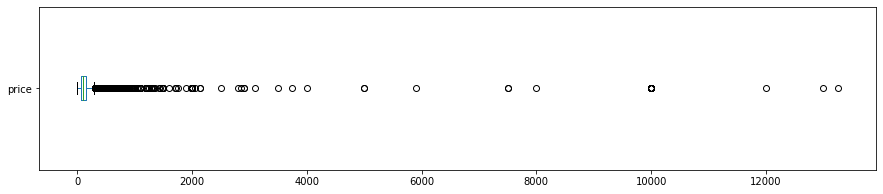


Valores com preço acima de 95% do dataset: 
1082 entradas
4.6245%


In [28]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

#ver a quantidade de valores acima do percentil de 95%
print("\nValores com preço acima de 95% do dataset: ")
print('{} entradas'.format(len(df[df.price > df.price.quantile(q=0.95)])))
print('{:.4f}%'.format((len(df[df.price > df.price.quantile(q=0.95)]) / df.shape[0])*100))

#### Boxplot para `minimum_nights`

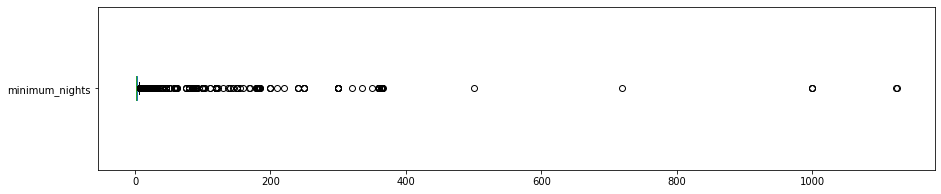


Valores acima de 30 dias:
485 entradas
2.0729%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver a quantidade de valores acima de 30 dias
print("\nValores acima de 30 dias:")
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histograma sem outliers

Agora que confirmamos a presença de *outliers* nas variáveis `price`e `minimum_nights`, vamos excluí-las do DataFrame e plotar novo histograma.

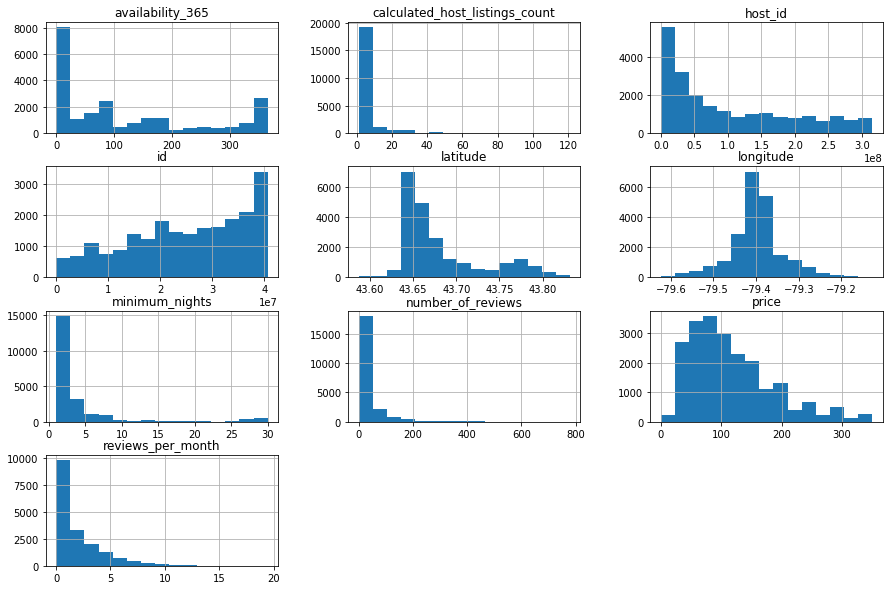

In [29]:
# remover os outliers em uma cópia do DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > df.price.quantile(q=0.95)].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover 'neighbourhood_group' que está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [30]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.013661,0.021761,0.077273,0.069438,0.033087
minimum_nights,-0.013661,1.000000,-0.120023,-0.204488,0.116452,0.102670
number_of_reviews,0.021761,-0.120023,1.000000,0.621598,-0.054631,0.037342
reviews_per_month,0.077273,-0.204488,0.621598,1.000000,-0.056390,0.027140
calculated_host_listings_count,0.069438,0.116452,-0.054631,-0.056390,1.000000,0.188896
availability_365,0.033087,0.102670,0.037342,0.027140,0.188896,1.000000


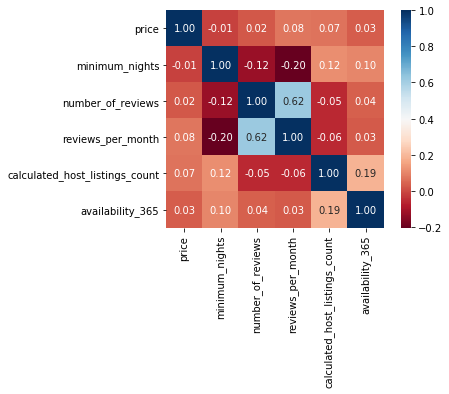

In [31]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Como podemos observar, não há correlações significativas no DataFrame. As variáveis mais correlacionadas são as `number_of_reviews` e `reviews_per_month`, o que faz muito sentido, visto que o imóveis que recebem mais reviews dentro de um mês tendem a ter mais reviews no total.

Também observamos uma pequena correlação negativa entre `reviews_per_month`e `minimum_nights`, o que mostra que imóveis que exigem um mínimo de noites maior, tendem a serem alugados por menos pessoas diferentes dentro de um mês, e por isso recebem menos reviews no mês.

Uma leve correlação pode ser observada entre a variável `availability`e `calculated_host_listings_count`, que mostra que os imóveis anunciados por *hosts* que possuem mais imóveis anunciados tendem a ter maior disponibilidade de data para locação. 

Isso pode ser um sinal de que os imóveis de *hosts* com mais de um imóvel anunciados são imóveis são imóveis destinados exclusivamente para locação.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

In [32]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13756
Private room        7613
Shared room          402
Hotel room            83
Name: room_type, dtype: int64

In [33]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    62.944999
Private room       34.835728
Shared room         1.839480
Hotel room          0.379793
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Toronto?**

Vamos comparar os bairros a partir do preço de locação.



#### Maiores preços por Bairro:

In [43]:
# ver preços por bairros, na média
high_prices = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
high_prices

neighbourhood
Waterfront Communities-The Island    165.552984
Niagara                              146.873326
Rosedale-Moore Park                  146.524272
Bay Street Corridor                  144.646688
Church-Yonge Corridor                127.717489
Moss Park                            127.042065
Yonge-Eglinton                       126.542857
Annex                                126.098609
Markland Wood                        125.428571
The Beaches                          123.868852
Name: price, dtype: float64

#### Menores Preços por Bairro:

In [45]:
low_prices = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]
low_prices

neighbourhood
Malvern                              46.483871
Black Creek                          48.555556
Glenfield-Jane Heights               49.250000
Eglinton East                        50.560976
Milliken                             56.333333
York University Heights              57.112195
Keelesdale-Eglinton West             57.294118
Mount Olive-Silverstone-Jamestown    57.590909
West Hill                            57.673077
Scarborough Village                  59.894737
Name: price, dtype: float64

#### É preciso ainda analisar se a quantidade de registros para cada bairro é representativo, pois podem haver distorções:

In [44]:
#ver a quantidade de imóveis em cada bairro (mais caros)
for bairro in high_prices.index:
  print(bairro,":",  df_clean[df_clean.neighbourhood == bairro].shape[0])

Waterfront Communities-The Island : 3888
Niagara : 971
Rosedale-Moore Park : 103
Bay Street Corridor : 634
Church-Yonge Corridor : 669
Moss Park : 523
Yonge-Eglinton : 105
Annex : 791
Markland Wood : 7
The Beaches : 183


Podemos ver que entre os bairros com maiores preços, o bairro Markland Wood possui somente 7 registros, possuindo portanto baixa representativade no dataset.

In [46]:
#ver a quantidade de imóveis em cada bairro (mais baratos)
for bairro in low_prices.index:
  print(bairro,":",  df_clean[df_clean.neighbourhood == bairro].shape[0])

Malvern : 124
Black Creek : 18
Glenfield-Jane Heights : 44
Eglinton East : 41
Milliken : 78
York University Heights : 205
Keelesdale-Eglinton West : 51
Mount Olive-Silverstone-Jamestown : 22
West Hill : 52
Scarborough Village : 19


Entre os bairros com menores preços, não observamos nenhum bairro com representativade extremamente baixa. Alguns bairros possuem poucos imóveis, porém pode ser que a região possua baixa demanda e por isso a disponibilidade é baixa.

#### Vamos plotar os imóveis distribuidos por preço no mapa:

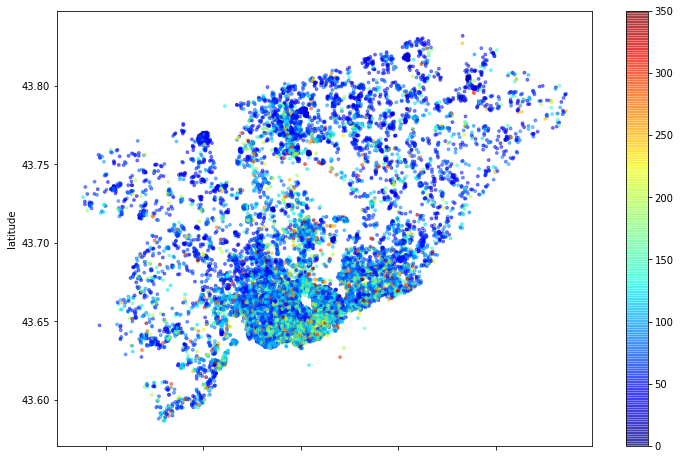

In [36]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Podemos observar que os imóveis mais caros estão localizados em sua maioria na região de Old Toronto.

### **Q8. Qual é de preços e a média do mínimo de noites para aluguel?**

In [42]:
# ver a média da coluna `minimum_nights``
print('A média de preços por noite é de {}'.format(round(df_clean.price.mean(),2)))
print('Em média o mínimo de noites para aluguel é de: {} noites'.format(round(df_clean.minimum_nights.mean(),2)))

A média de preços por noite é de 115.97
Em média o mínimo de noites para aluguel é de: 3.77 noites


## Conclusões


Essa foi minha primeira análise de dados realizada com dados reais.

Foi feita uma análise bem superficial dos dados, porém já foi possível identificar a presença de *outliers* em algumas variáveis, sendo realizado a sua correção.

Em trabalhos futuros buscaremos trabalhar com a base de dados completa disponibilizada pelo AirBnb!